### 연습문제 1

- MLP는 회귀 분석에도 이용할 수 있다.
- MLPRegressor를 이용하여 reg.csv 파일을 대상으로 회귀 분석을 수행하시오.
    - 이때, 적절히 데이터의 특성을 처리하시오.

In [1]:
import pandas as pd
import os

path = r'D:\elice_python\GAS_5\pytest_machine'
os.chdir(path)

In [3]:
data = pd.read_csv('reg.csv')
print(data.head(1))
print(data.shape)
print(data.info())

    x1    x2      x3   x4     x5     x6     x7     x8   x9    x10  ...  \
0  0.0  0.18  0.0678  0.0  0.315  0.578  0.642  0.269  0.0  0.208  ...   

      x96    x97     x98     x99   x100    x101  x102    x103     x104     y  
0  0.0597  0.208  0.0187  0.0825  0.287  0.0258   1.0  0.0897  0.00804  24.0  

[1 rows x 105 columns]
(506, 105)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 105 entries, x1 to y
dtypes: float64(105)
memory usage: 415.2 KB
None


In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((506, 104), (506,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X_train)
X_train_mms = mms.transform(X_train)
X_test_mms = mms.transform(X_test)

X_train.shape, X_train_mms.shape, type(X_train), type(X_train_mms)

((379, 104), (379, 104), pandas.core.frame.DataFrame, numpy.ndarray)

In [33]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(max_iter=1000, 
                    alpha=1.19, 
                    activation='relu', 
                    solver='adam', 
                    learning_rate='adaptive', 
                    hidden_layer_sizes=(104,104), 
                    random_state=42)

mlpr.fit(X_train_mms, y_train)

print(mlpr.score(X_train_mms, y_train))
print(mlpr.score(X_test_mms, y_test))

0.9756074751733012
0.8631499754455875


### 연습문제 2~5 설명
- human_activity 폴더의 데이터는 삼성 갤럭시 2를 이용하여 사람의 활동을 수집한 데이터이다.
- 이 데이터에는 움직임과 관련된 561개의 독립변수(X_train)가 있으며, 종속변수(y_train)는 6가지 동작으로 구분된다. (걷기, 걷기_위층, 걷기_아래층, 앉기, 서기, 눕기)
- 독립변수 정보는 feature.txt 및 features_info.txt 파일에 있다.
- train, test 데이터는 각각의 폴더에 분리되어 있다.

In [1]:
import pandas as pd
import os

path = r'D:\elice_python\GAS_5\pytest_machine\human_activity'
os.chdir(path)

#### 연습문제 2
- features.txt의 내용을 이용해 X_train과 X_test에 컬럼 이름 입히기.

In [2]:
X_train = pd.read_csv('./train/X_train.txt', delimiter='\s+', header=None)

In [3]:
X_train.head(1)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627


In [4]:
X_train.shape

(7352, 561)

In [5]:
X_features = pd.read_csv('./features.txt', delimiter='\s+', header=None)
X_features.head(1)

,0,1
0,1,tBodyAcc-mean()-X


In [6]:
X_train = X_train.rename(X_features.iloc[:,-1], axis=1)

In [7]:
X_train.head(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627


In [8]:
X_test = pd.read_csv('./test/X_test.txt', delimiter='\s+', header=None).rename(X_features.iloc[:,1], axis=1)
X_test.head(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.33037,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978


In [9]:
X_test.shape

(2947, 561)

In [13]:
y_train = pd.read_csv('./train/y_train.txt', delimiter='\s+', header=None)
y_train = y_train.iloc[:,-1]

In [14]:
y_test = pd.read_csv('./test/y_test.txt', delimiter='\s+', header=None)
y_test = y_test.iloc[:,-1]

In [15]:
y_train.shape, y_test.shape

((7352,), (2947,))

#### 연습문제 3
- MLP를 사용하여 모델을 만드시오
    - 다양한 방식으로 만들어 성능 비교
    - 컬럼이 공백으로 구분되어 있는 .txt 파일이므로 read_csv의 sep 파라미터를 '\s'로 설정해 읽을 수 있다.

In [16]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X_train)

In [17]:
X_train_mms = mms.transform(X_train)
X_test_mms = mms.transform(X_test)

In [18]:
from sklearn.neural_network import MLPRegressor
model1 = MLPRegressor(max_iter=1000, 
                    alpha=1.19, 
                    activation='relu', 
                    solver='adam', 
                    learning_rate='adaptive', 
                    hidden_layer_sizes=(561,561), 
                    random_state=42)


In [19]:
model2 = MLPRegressor(max_iter=1000, 
                    alpha=1.19, 
                    activation='relu', 
                    solver='adam', 
                    learning_rate='adaptive', 
                    hidden_layer_sizes=(100,100,100), 
                    random_state=42)

In [20]:
from sklearn.neural_network import MLPRegressor
model3 = MLPRegressor(max_iter=1000, 
                    alpha=0.19, 
                    activation='relu', 
                    solver='adam', 
                    learning_rate='adaptive', 
                    hidden_layer_sizes=(561,561), 
                    random_state=42)

In [21]:
for i, model in enumerate((model1,model2,model3)):
    model.fit(X_train_mms, y_train)
    
    print(i, ':', model.score(X_train_mms, y_train))
    print(i, ':', model.score(X_test_mms, y_test))

0 : 0.9814830704875259
0 : 0.968537754793495
1 : 0.9879068046321532
1 : 0.9764885229586984
2 : 0.9954877113475489
2 : 0.9827346611060855


In [22]:
import joblib

for i in range(3):
    model_name = f'{i}_MLPR.joblib'
    joblib.dump(model, os.path.join(path, model_name))

#### 연습문제 4
- Decision Tree를 이용하여 모델을 만들되, GridSearchCV를 이용해 트리의 최적 max_depth를 찾으시오 (cv=5)
- 최적 파라미터로 모델을 다시 만들어, 테스트 데이터의 정확도를 구하시오.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  GridSearchCV
import numpy as np
model_dtc = DecisionTreeClassifier()
arange = np.concatenate((
    np.arange(0.001, 0.01, 0.001),
    np.arange(0.01, 0.1, 0.01),
    np.arange(0.1, 1, 0.1),
    np.arange(1, 10, 1),
    np.arange(10, 100, 10)
))

In [27]:
grid_param = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"],
    'max_depth' : np.arange(3,11,1),
}

gdtc = GridSearchCV(DecisionTreeClassifier( 
                                    random_state=42
                                    ), 
                    param_grid=grid_param, cv=5)

In [28]:
gdtc.fit(X_train_mms,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'splitter': ['best', 'random']})

In [29]:
print(gdtc.best_score_)
print(gdtc.best_params_)

0.8775901441473939
{'criterion': 'gini', 'max_depth': 6, 'splitter': 'random'}


In [37]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, splitter='random', random_state=42)
dtc.fit(X_train_mms,y_train)

DecisionTreeClassifier(max_depth=6, random_state=42, splitter='random')

In [38]:
dtc.score(X_test_mms, y_test)

0.833389888021717

#### 연습문제 5-1
- 연습문제 4에서 만든 최적모델로 특성 중요도 그래프를 그리시오.
    - 스케일된 데이터는 넘파이 배열이므로 컬럼 이름이 바로 나오지 못한다.
    - 여기서는 스케일되지 않은 모델로 그래프를 그려본다.
        - 현재 컬럼이 너무 많아 확인이 어려운 것까지 확인하고 5-2로 넘어간다.

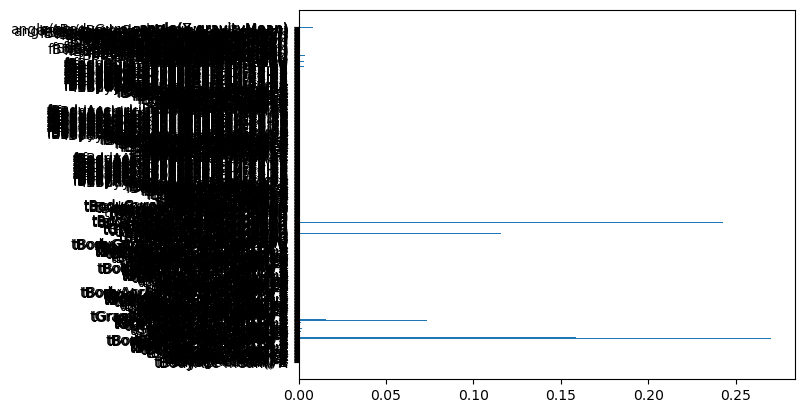

In [40]:
import matplotlib.pyplot as plt
plt.barh(np.arange(len(X_test.columns)), dtc.feature_importances_, align='center')
plt.yticks(np.arange(len(X_test.columns)), X_test.columns)

plt.show()

#### 연습문제 5-2
- 그래프로는 중요도가 잘 확인되지 않기 때문에 높은 중요도의 컬럼을 직접 출력한다. 
    - `np.argmax()`를 사용.

- 전체 중요도를 출력하시오.
- 가장 높은 중요도를 갖는 칼럼의 인덱스, 이름, 값을 출력하시오.

In [41]:
print(dtc.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00575078 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01961454 0.         0.         0.27023284 0.15846998
 0.00239409 0.         0.         0.         0.         0.
 0.         0.00897934 0.         0.0012903  0.         0.
 0.         0.         0.0020496  0.         0.         0.
 0.         0.         0.04529874 0.         0.         0.
 0.00160996 0.         0.         0.         0.07347634 0.01557987
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

In [42]:
i = np.argmax(dtc.feature_importances_)

print(i, X_train.columns[i], dtc.feature_importances_[i])

40 tGravityAcc-mean()-X 0.2702328374461406


#### 연습문제 5-3
- 중요도가 높은 순으로 정렬하여 출력해본다.
    - `np.argsort()` 사용
        - argsort()는 오름차순으로 정렬되므로 [::-1]로 변환해주자!

- 중요도 컬럼의 인덱스와 내용을 중요한 순으로 출력하기.

In [58]:
sorted_importances = np.argsort(dtc.feature_importances_)[::-1]

features_ranking = [[i, X_train.columns[i], dtc.feature_importances_[i]] for i in sorted_importances]

print(*features_ranking, sep='\n')


[40, 'tGravityAcc-mean()-X', 0.2702328374461406]
[233, 'tBodyAccJerkMag-iqr()', 0.2428186936610023]
[41, 'tGravityAcc-mean()-Y', 0.15846998090544204]
[215, 'tGravityAccMag-mad()', 0.11597281337441662]
[70, 'tGravityAcc-arCoeff()-Y,2', 0.07347633768472339]
[62, 'tGravityAcc-entropy()-X', 0.04529873925636509]
[37, 'tBodyAcc-correlation()-X,Y', 0.01961454030326765]
[71, 'tGravityAcc-arCoeff()-Y,3', 0.015579866924079252]
[49, 'tGravityAcc-max()-X', 0.008979337186876624]
[559, 'angle(Y,gravityMean)', 0.007997390368613504]
[426, 'fBodyGyro-std()-X', 0.006708793091770015]
[9, 'tBodyAcc-max()-X', 0.005750780258863012]
[314, 'fBodyAcc-bandsEnergy()-1,24', 0.004232982078815922]
[512, 'fBodyAccMag-meanFreq()', 0.003795379075716765]
[494, 'fBodyGyro-bandsEnergy()-49,56', 0.0032967301667434037]
[502, 'fBodyAccMag-mean()', 0.0030686314616270704]
[157, 'tBodyGyro-correlation()-X,Y', 0.0030486552922853517]
[42, 'tGravityAcc-mean()-Z', 0.002394094351105792]
[56, 'tGravityAcc-energy()-X', 0.002049601126

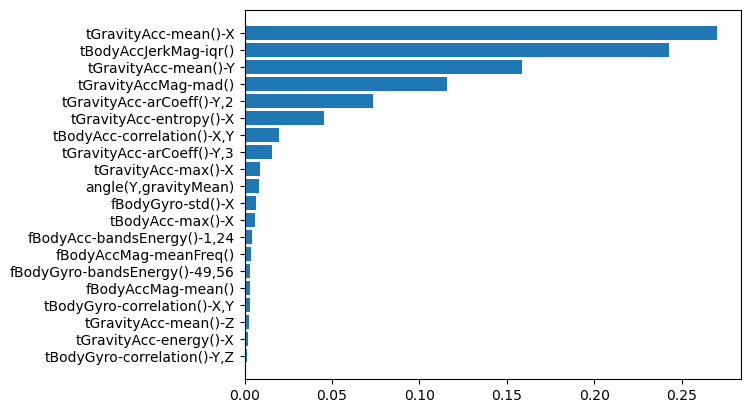

In [74]:
import matplotlib.pyplot as plt
n = 20
var = list(zip(*features_ranking[:n]))

plt.barh(np.arange(n), var[2][::-1], align='center')
plt.yticks(np.arange(n), var[1][::-1])

plt.show()